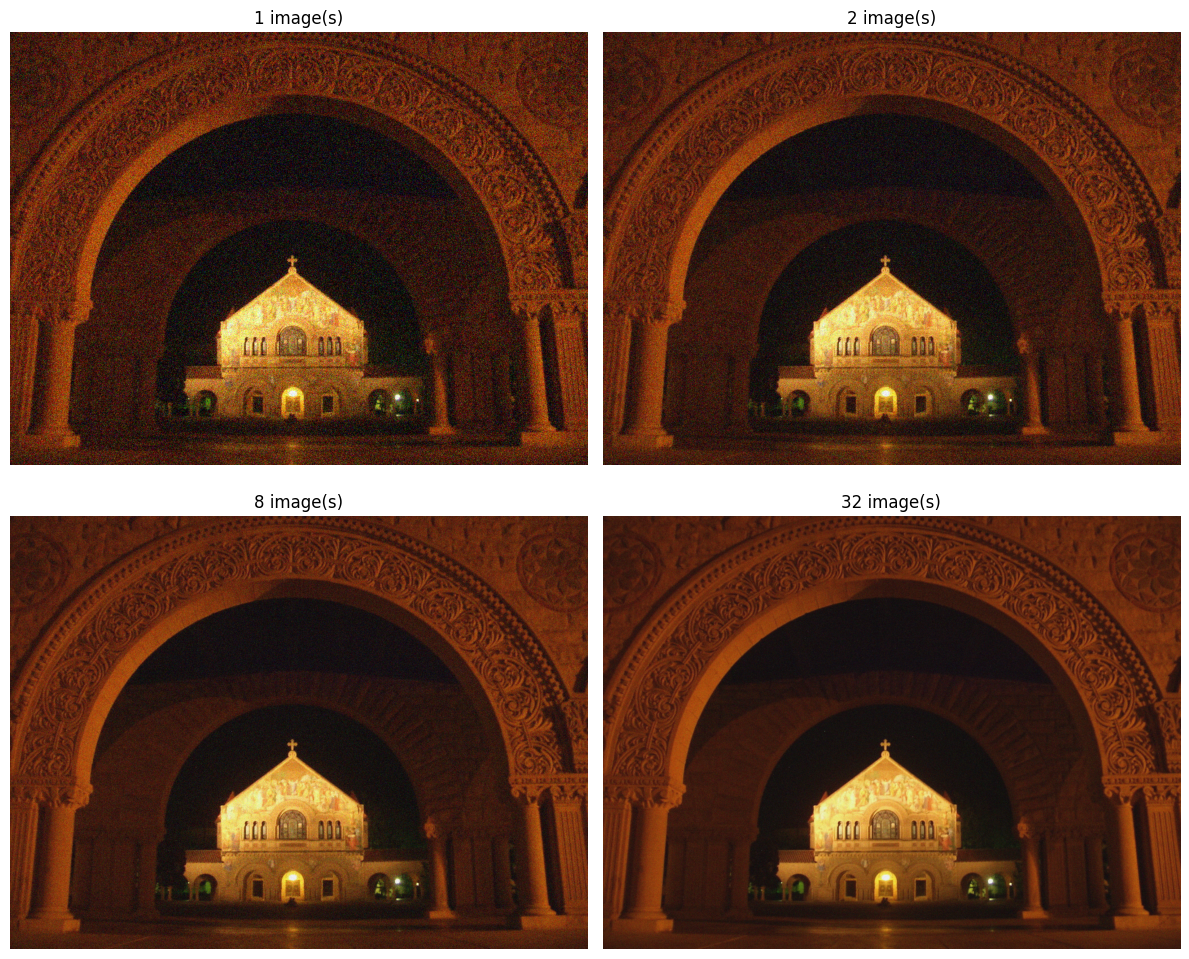

In [1]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
 
# Load image in color and convert to float64 [0, 1]
img = cv2.imread('quadnight.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
img_double = img.astype(np.float64) / 255.0  # im2double equivalent
 
# Define array of sample counts
n_array = [1, 2, 8, 32]
 
# Prepare plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
 
# Loop over sample counts
for idx, N in enumerate(n_array):
    avg_img = np.zeros_like(img_double)
 
    for _ in range(N):
        # Add Gaussian noise to each channel
        noise = np.random.normal(loc=0, scale=np.sqrt(0.02), size=img_double.shape)
        noisy_img = img_double + noise
        noisy_img = np.clip(noisy_img, 0, 1)
        avg_img += noisy_img
 
    avg_img /= N
 
    # Display using matplotlib (not seaborn, since seaborn is better for grayscale heatmaps)
    axes[idx].imshow(avg_img)
    axes[idx].set_title(f'{N} image(s)')
    axes[idx].axis('off')
 
    # Save the averaged image as PNG
    avg_uint8 = (avg_img * 255).astype(np.uint8)
    cv2.imwrite(f'Image_Averaging_{N}avg.png', cv2.cvtColor(avg_uint8, cv2.COLOR_RGB2BGR))  # Convert back to BGR for saving
 
plt.tight_layout()
plt.show()